In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_excel("Amazon-EDA.xlsx")

In [21]:
dataset.head(6)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
1,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630
2,45,CA-2016-118255,2016-03-11,2016-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,...,55122,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.980,2,0.0,19.7714
3,46,CA-2016-118255,2016-03-11,2016-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,...,55122,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.460,2,0.0,8.2062
4,56,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.560,6,0.0,52.1400
5,57,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.400,5,0.0,15.5520


# MISSING VALUE ANALYSIS

In [22]:
#MISSING VALUE ANALYSIS
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
#As we can see there is no null values in any columns of the DATASET,
#Else we would have filled the null values using the (.fillna) attribute

# UNIVARIATE ANALYSIS

## Product Category

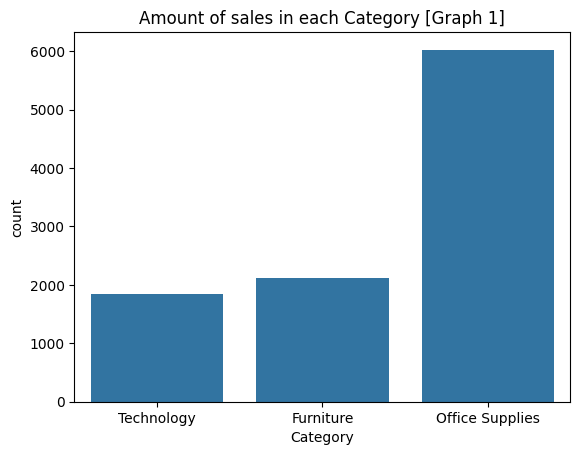

In [4]:
#Visualising the No. ofsales in each Category
sns.countplot(x="Category", data=dataset)
plt.title("Amount of sales in each Category [Graph 1]")
plt.savefig("Amount of sales in each Category.jpg") #Saving the graph figure made below
plt.show()

## Segment

In [24]:
dataset['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3019
Home Office    1783
corporate         1
Name: count, dtype: int64

In [6]:
#Since we are getting two types of corporate in SEGMENT Column so we are replacing the Corporate having small c with Capital C.
dataset['Segment'] = dataset['Segment'].replace("corporate", "Corporate")
dataset['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

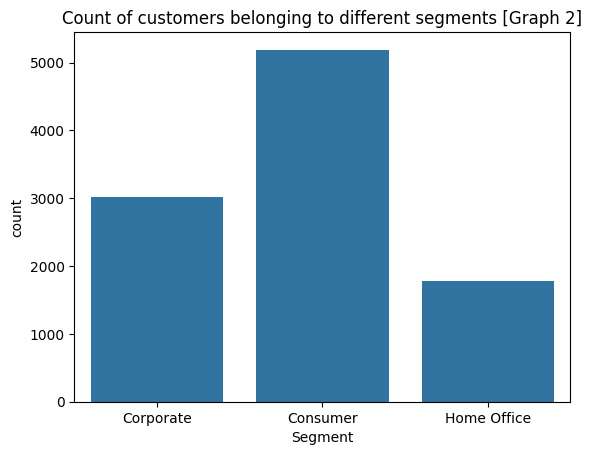

In [7]:
#Visualising the No. of Customer in each segment
sns.countplot(x="Segment", data=dataset)
plt.title("Count of customers belonging to different segments [Graph 2]")
plt.savefig("Count of customers belonging to different segments.jpg") #Saving the graph figure made below
plt.show()

#### By the the above graph we can clearly see that the maximum customer belongs to the "consumer segment".

## Shipping Mode

In [27]:
dataset['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

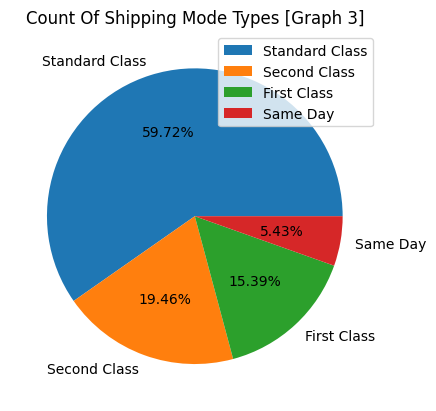

In [8]:
ship_mode_qty = dataset['Ship Mode'].value_counts().values #Getting the Values only
ship_mode_type = dataset['Ship Mode'].value_counts().index #Getting the Types only
plt.pie(ship_mode_qty, labels=ship_mode_type, autopct="%0.2f%%") #Formula for getting the values in Percentage (%0.2f%%)
plt.legend(loc=1)
plt.title("Count Of Shipping Mode Types [Graph 3]")
plt.savefig("Count Of Shipping Mode Types.jpg")
plt.show()

## Count of sales of different Regions 

In [69]:
dataset["Region"].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

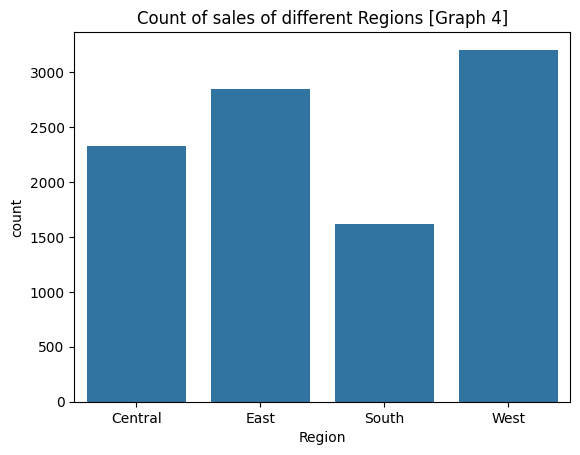

In [9]:
sns.countplot(x="Region", data=dataset)
plt.title("Count of sales of different Regions [Graph 4]")
plt.show()

# BIVARIATE ANALYSIS

## Count of Product Category in each shipping mode

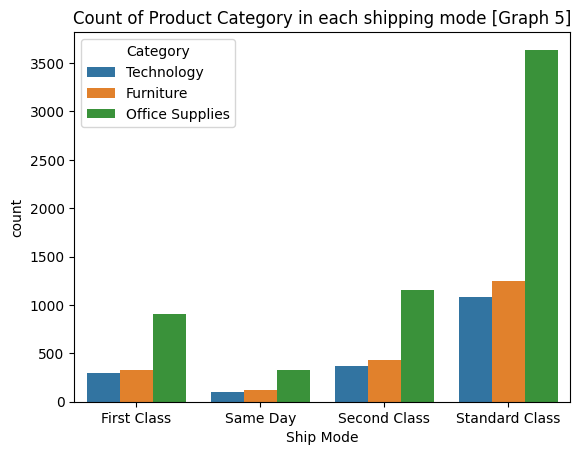

In [10]:
sns.countplot(x="Ship Mode", data=dataset, hue="Category")
plt.title("Count of Product Category in each shipping mode [Graph 5]")
plt.show()

## Count of sales of Sub-Category in Technology Category

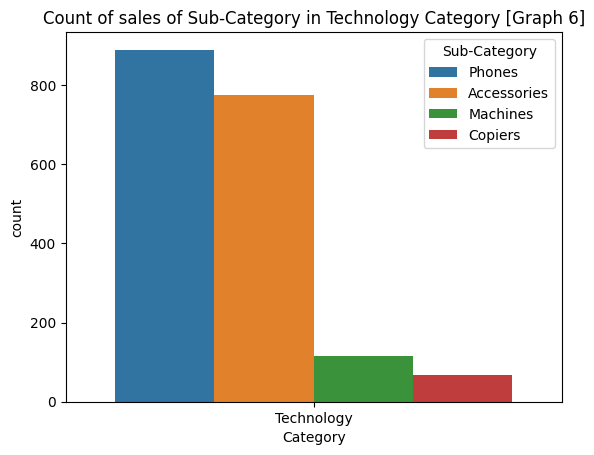

In [11]:
sns.countplot(x="Category", data=dataset[dataset["Category"]=="Technology"], hue="Sub-Category")
plt.title("Count of sales of Sub-Category in Technology Category [Graph 6]")
plt.show()

## Count of sales of Sub-Category in Furniture Category

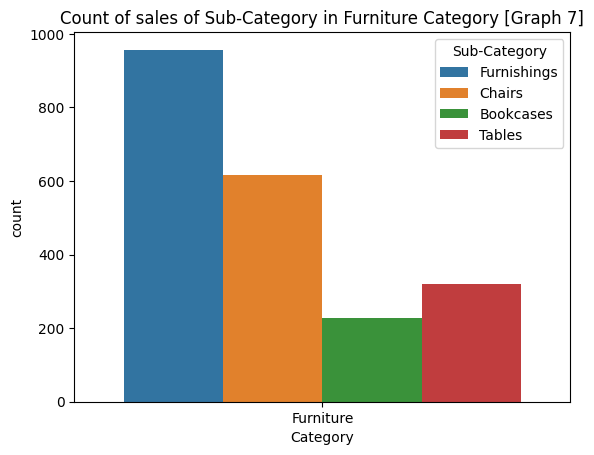

In [12]:
sns.countplot(x="Category", data=dataset[dataset["Category"]=="Furniture"], hue="Sub-Category")
plt.title("Count of sales of Sub-Category in Furniture Category [Graph 7]")
plt.show()

## Count of sales of Sub-Category in Office Supplies Category

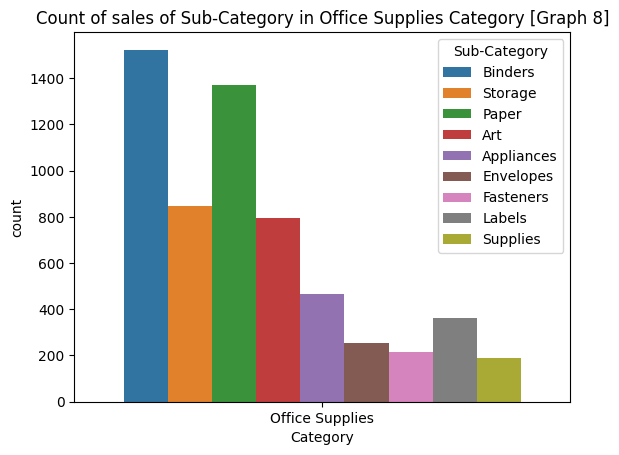

In [14]:
sns.countplot(x="Category", data=dataset[dataset["Category"]=="Office Supplies"], hue="Sub-Category")
plt.title("Count of sales of Sub-Category in Office Supplies Category [Graph 8]")
plt.show()

## Profit in each Category

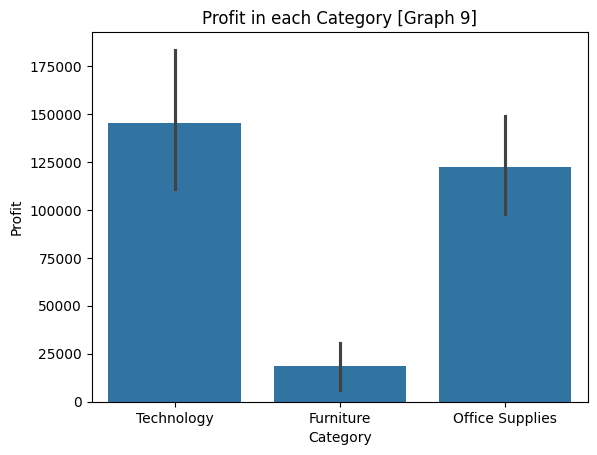

In [15]:
sns.barplot(x="Category", y="Profit", data=dataset, estimator='sum')
plt.title("Profit in each Category [Graph 9]")
plt.show()

# TIME SERIES ANALYSIS

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
#Now we will take out the year from the Order date and make a new column of it.

dataset["Order Year"] = dataset["Order Date"].dt.year

In [45]:
dataset.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
0,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2016
1,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,2016
2,45,CA-2016-118255,2016-03-11,2016-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,...,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.980,2,0.0,19.7714,2016


In [46]:
#SO now we can see that we have got the ORDER YEAR Column.

## No. of orders in each year

In [48]:
dataset["Order Year"].value_counts()

Order Year
2017    3312
2016    2587
2015    2102
2014    1993
Name: count, dtype: int64

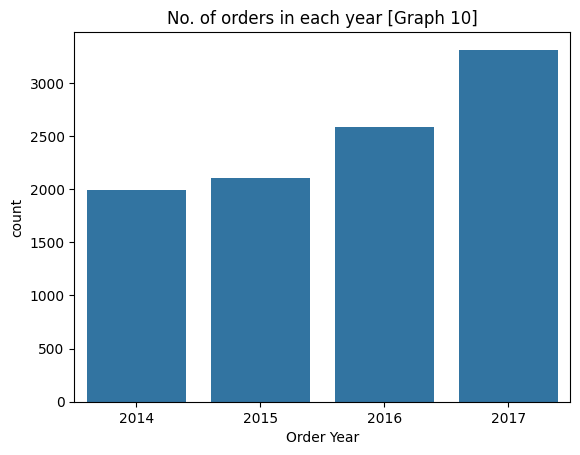

In [18]:
sns.countplot(x="Order Year", data=dataset)
plt.title("No. of orders in each year [Graph 10]")
plt.show()

## ----------------------------------------------------------------------------------------------------------

# ANALYSIS OUTCOME

### On examining the different graphs through the above analysis we get the following outcomes:

#### 1>> GRAPH 1 : It's been revealed that the "Office Supplies" category is experiencing exceptionally high demand and has achieved the highest sales figures.
#### 2>> GRAPH 2 : It has been seen that the "Consumer" segment comprises the maximum number of customers purchasing the products.
#### 3>> GRAPH 3 : It's found that the most preffered ship mode of the customers is "Standard Class" Ship Mode.
#### 4>> GRAPH 4 : The maximum customer base is located in the West region, followed by the East, Central, and South regions.
#### 5>> GRAPH 5 : It Tells us the count of products shipped of each product category through different shipping Modes. which are as follows: 
                    Standard Ship Mode: Office Supplies > Furniture > Technology
                    Second Class Ship Mode: Office Supplies > Furniture > Technology
                    First Class Ship Mode: Office Supplies > Furniture > Technology
                    Same Day Ship Mode: Office Supplies > Furniture > Technology
#### 6>> GRAPH 6 : Within the "Technology" category, the highest sales is achieved in the "Phones" sub-category.  
#### 7>> GRAPH 7 : Within the "Furniture" category, the highest sales are attributed to the "Furnishing" sub-category.
#### 8>> GRAPH 8 : Within the "Office Supplies" category, the company has achieved the highest sales in the "Binders" sub-category.
#### 9>> GRAPH 9 : Among the different categories, the "Technology" category has garnered the highest amount of profit, followed by the Office Supplies and Furniture categories.
#### 10>> GRAPH 10 : Since 2014, sales have experienced exponential growth, culminating in the data of 2017

#### 
#### Hence, Based on the analysis outcomes above, the company can effectively increase its sales rate and consequently generate greater profits.